In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from keras.models import Sequential

tf.__version__

'2.8.2'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("train.csv")
df.sample(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
84722,84722,61274,Male,Loyal Customer,18,Personal Travel,Eco,862,2,5,...,3,3,3,5,4,4,3,2,0.0,neutral or dissatisfied
14033,14033,12734,Female,Loyal Customer,23,Personal Travel,Eco,803,3,4,...,1,2,3,5,3,3,1,0,4.0,neutral or dissatisfied
67835,67835,39471,Male,Loyal Customer,55,Business travel,Eco,867,4,4,...,4,2,1,5,4,4,4,19,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

# **Exploratory Data Analysis**

In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

# **Univariate Analysis**

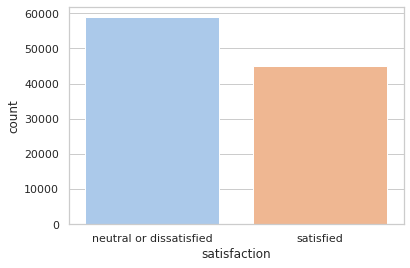

In [ ]:
#satisfaction

sns.countplot(x='satisfaction',data=df, palette='pastel')
plt.show()

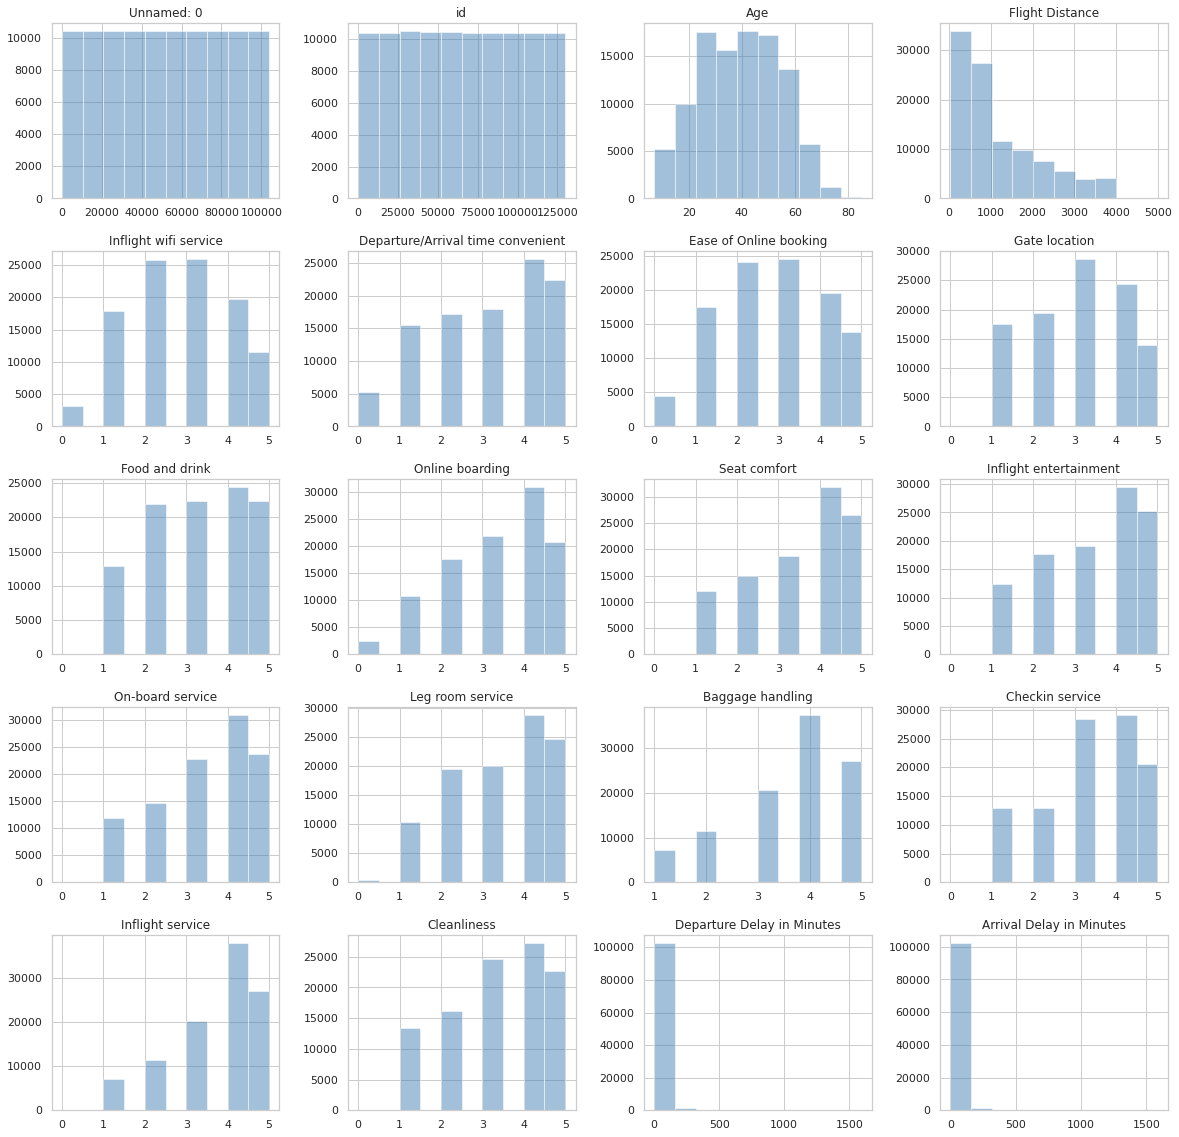

In [ ]:
#from pandas.plotting import scatter_matrix
df.hist(alpha=0.5, figsize=(20, 20), color='steelblue')
plt.show()

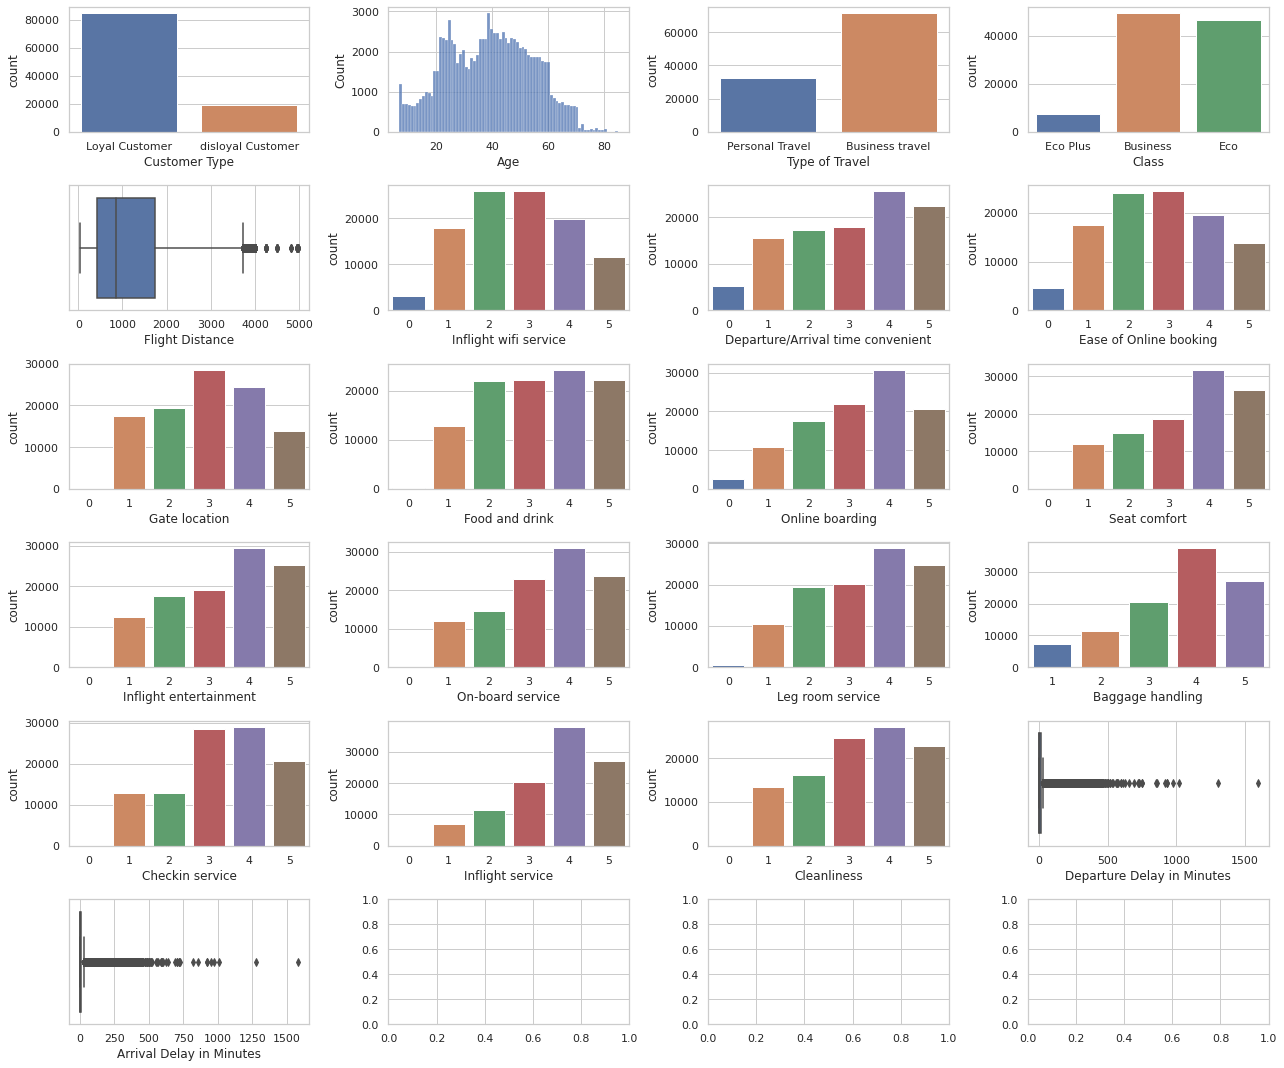

In [ ]:
fig, axes = plt.subplots(6, 4, figsize=(18, 15))

sns.countplot(ax=axes[0, 0], data=df, x='Customer Type')
sns.histplot(ax=axes[0, 1], data=df, x='Age', palette = 'deep')
sns.countplot(ax=axes[0, 2], data=df, x='Type of Travel')
sns.countplot(ax=axes[0, 3], data=df, x='Class')
sns.boxplot(ax=axes[1, 0], data=df, x='Flight Distance')
sns.countplot(ax=axes[1, 1], data=df, x='Inflight wifi service')
sns.countplot(ax=axes[1, 2], data=df, x='Departure/Arrival time convenient')
sns.countplot(ax=axes[1, 3], data=df, x='Ease of Online booking')
sns.countplot(ax=axes[2, 0], data=df, x='Gate location')
sns.countplot(ax=axes[2, 1], data=df, x='Food and drink')
sns.countplot(ax=axes[2, 2], data=df, x='Online boarding')
sns.countplot(ax=axes[2, 3], data=df, x='Seat comfort')
sns.countplot(ax=axes[3, 0], data=df, x='Inflight entertainment')
sns.countplot(ax=axes[3, 1], data=df, x='On-board service')
sns.countplot(ax=axes[3, 2], data=df, x='Leg room service')
sns.countplot(ax=axes[3, 3], data=df, x='Baggage handling')
sns.countplot(ax=axes[4, 0], data=df, x='Checkin service')
sns.countplot(ax=axes[4, 1], data=df, x='Inflight service')
sns.countplot(ax=axes[4, 2], data=df, x='Cleanliness')
sns.boxplot(ax=axes[4, 3], data=df, x='Departure Delay in Minutes')
sns.boxplot(ax=axes[5, 0], data=df, x='Arrival Delay in Minutes')

fig.tight_layout()

In [ ]:
numerics = ['int64','float64']
categorics= ['object']

df_num_col = df.select_dtypes(include = numerics).columns
df_cat_col = df.select_dtypes(include = categorics).columns

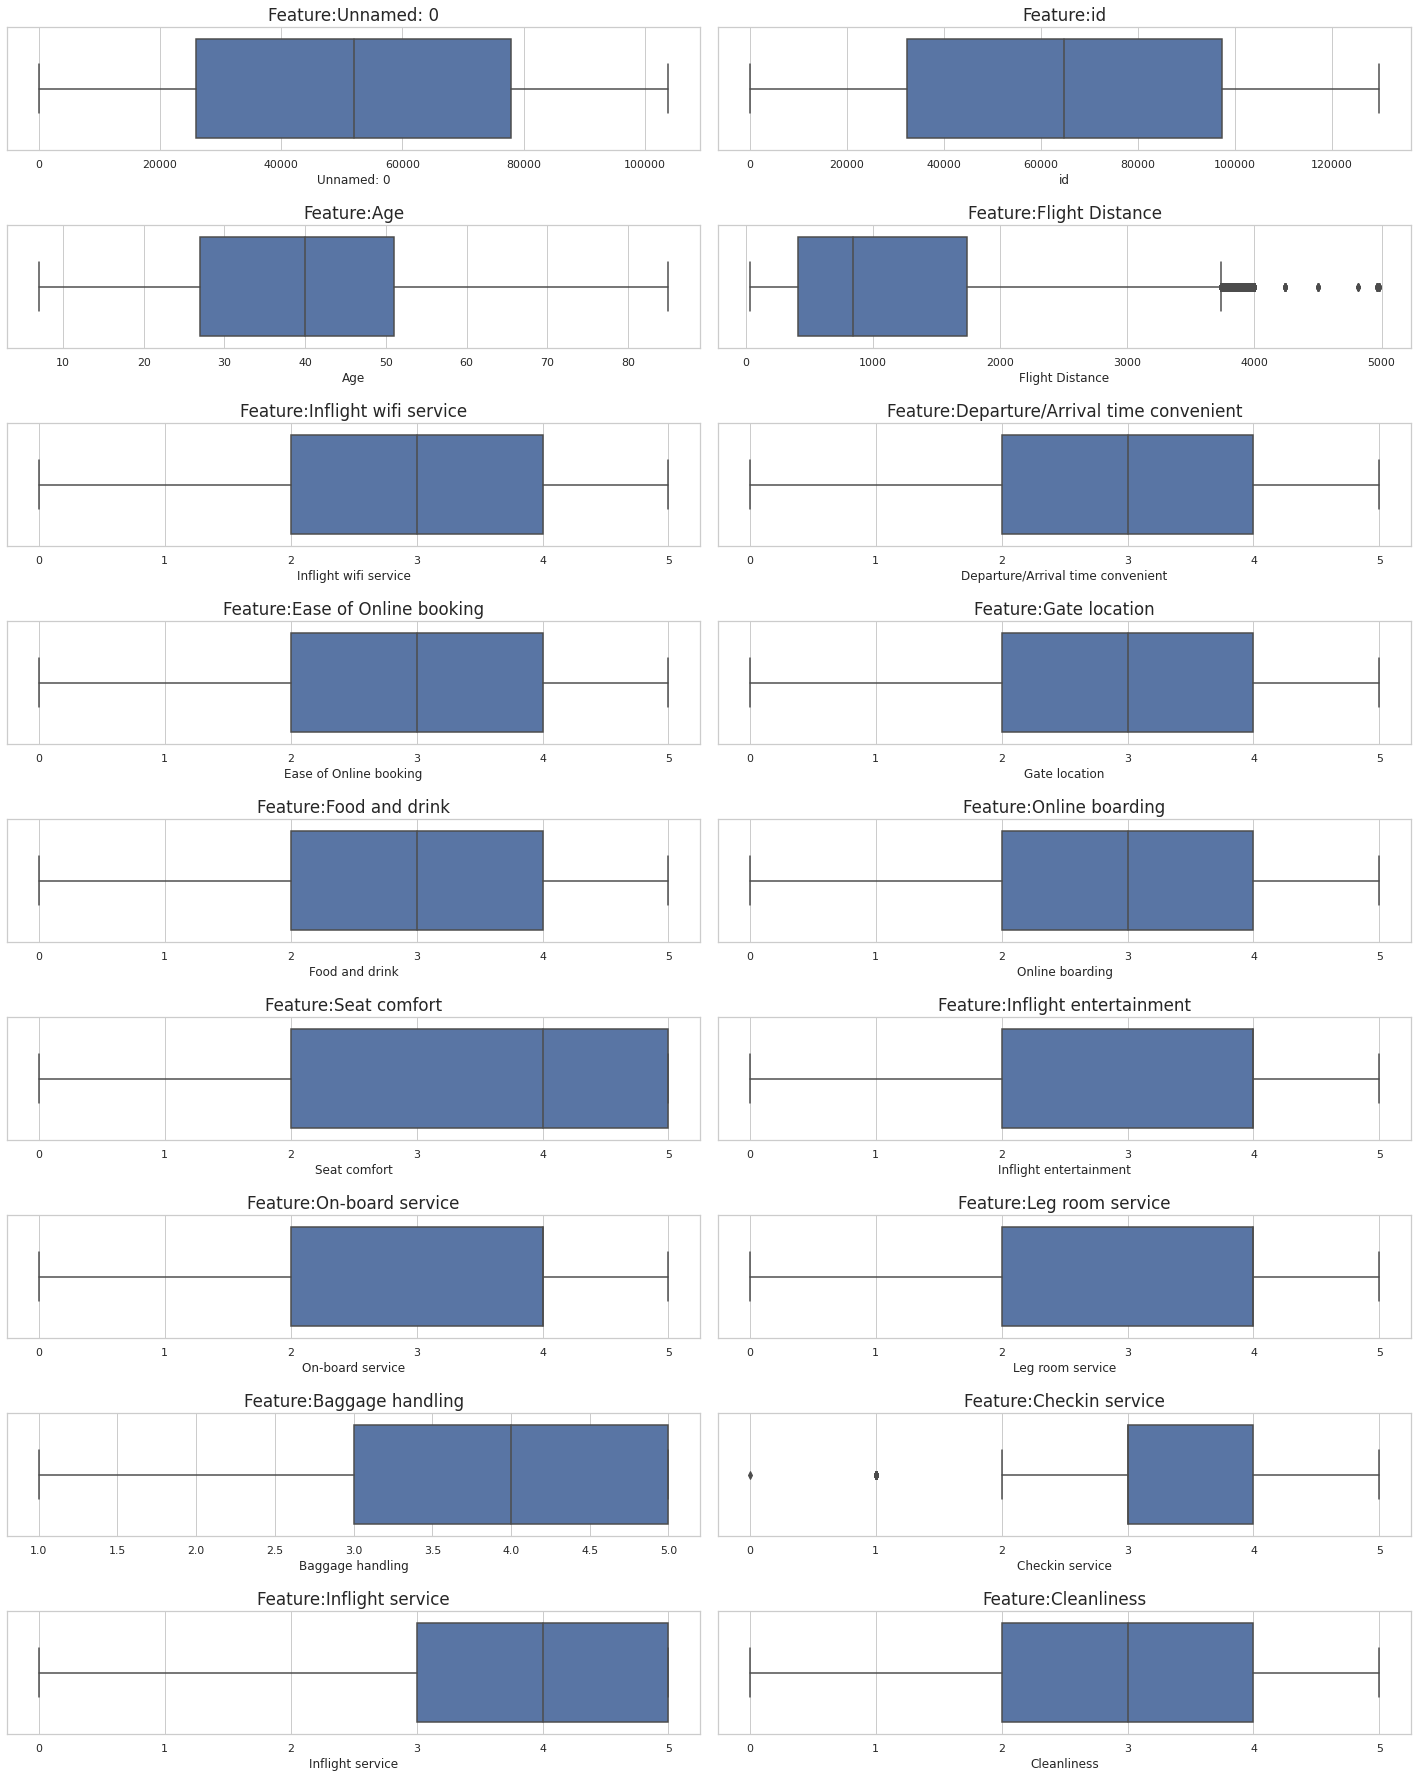

In [ ]:
fig, axs = plt.subplots(9, 2, figsize=(20,25))
fig.tight_layout(pad=5.0)

for f,ax in zip(df_num_col,axs.ravel()):
    sns.set(font_scale = 1.4)
    ax=sns.boxplot(ax=ax, data=df, x=df[f])
    ax.set_title('Feature:'+ f)

fig.tight_layout()

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# **Bivariate Analysis**

Text(0, 0.5, 'Type of Travel')

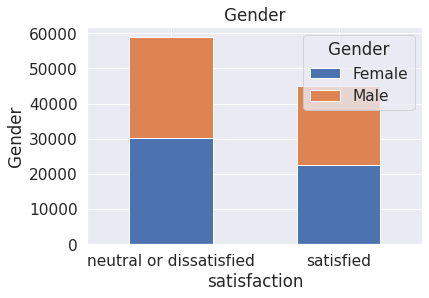

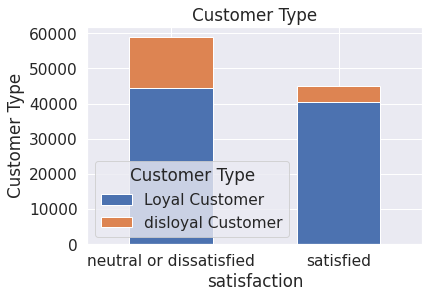

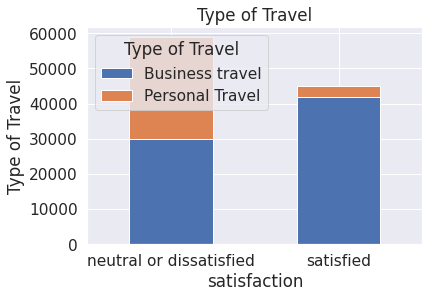

In [ ]:
pd.crosstab(df.satisfaction, df.Gender).plot(kind='bar', stacked=True, rot=0)
plt.title('Gender')
plt.xlabel('satisfaction')
plt.ylabel('Gender')

pd.crosstab(df.satisfaction, df['Customer Type']).plot(kind='bar', stacked=True, rot=0)
plt.title('Customer Type')
plt.xlabel('satisfaction')
plt.ylabel('Customer Type')

pd.crosstab(df.satisfaction, df['Type of Travel']).plot(kind='bar', stacked=True, rot=0)
plt.title('Type of Travel')
plt.xlabel('satisfaction')
plt.ylabel('Type of Travel')


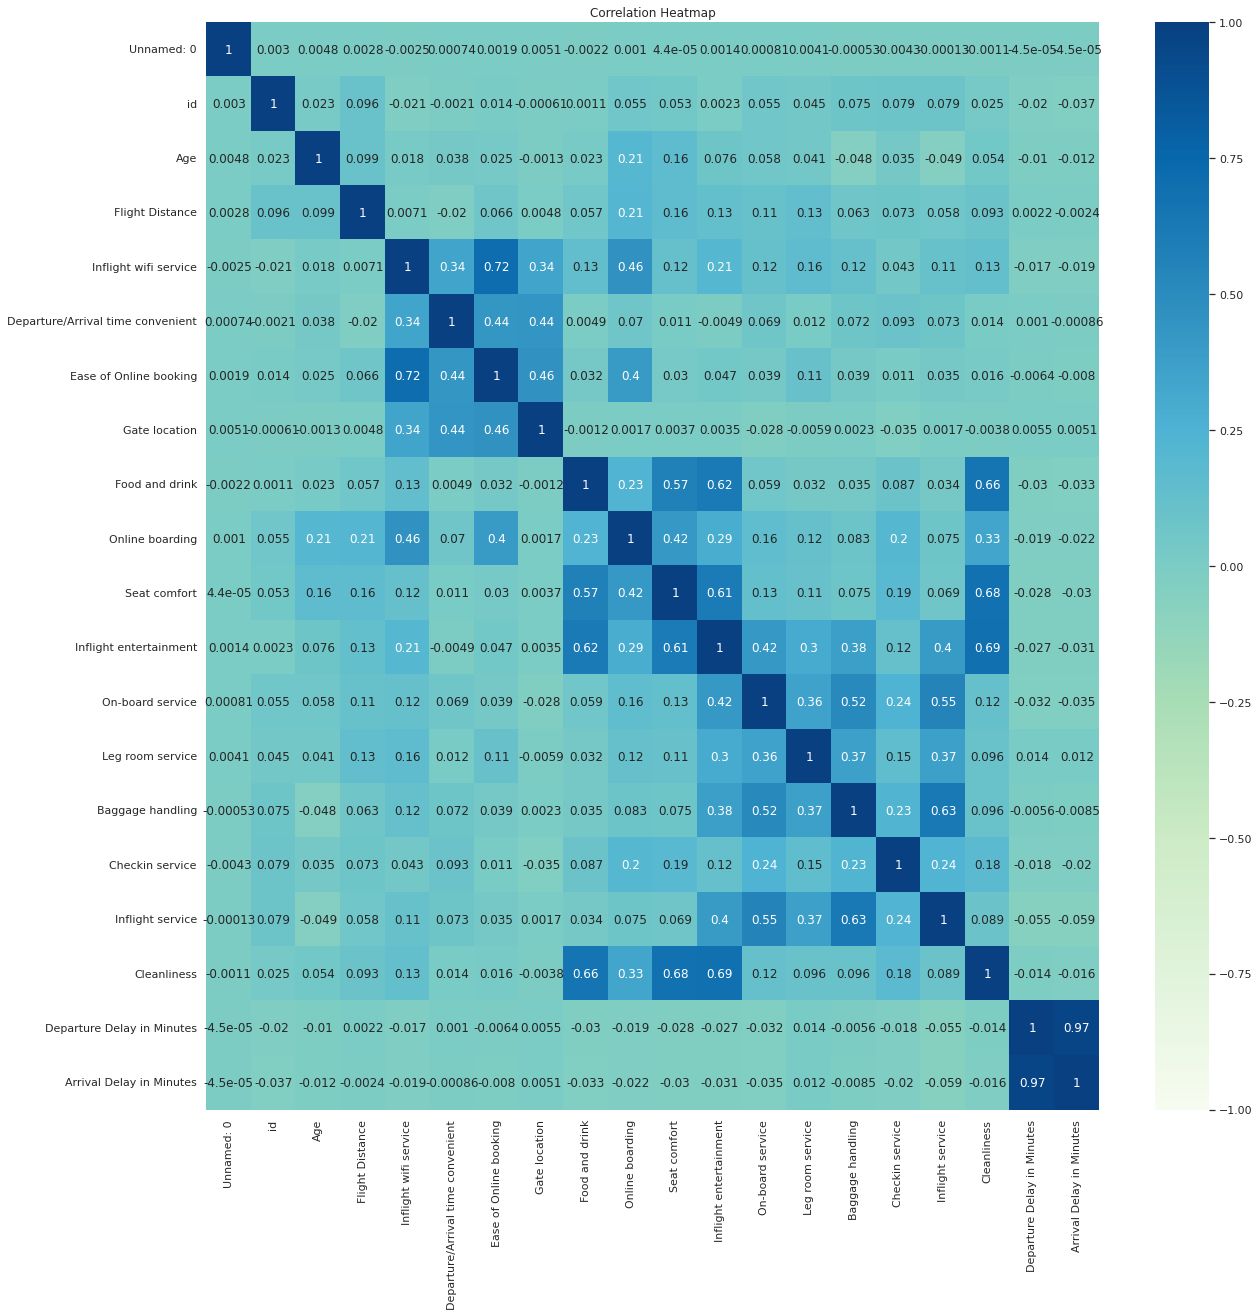

In [ ]:
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='GnBu')
heatmap.set_title('Correlation Heatmap') #fontdict={'fontsize':18}, pad=12)
sns.set(font_scale=0.6)

# **Data Preprocessing**

In [ ]:
# Dropping Unnamed: 0:
df = df.drop(['Unnamed: 0', 'id'], axis=1)


# Removing outliers:
df=df[df['Departure Delay in Minutes'] < 550]
df=df[df['Arrival Delay in Minutes'] < 550]


# Dropping Nulls
df = df.dropna(how='any',axis=0)


#df.isnull().sum()

In [ ]:
# Convert categorical to numerical
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Customer Type'] = labelencoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = labelencoder.fit_transform(df['Type of Travel'])
df['Class'] = labelencoder.fit_transform(df['Class'])
df['satisfaction'] = labelencoder.fit_transform(df['satisfaction'])

In [ ]:
df.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
76879,0,1,26,0,0,190,1,4,2,4,...,5,5,3,5,3,4,5,27,12.0,0
86873,0,0,41,1,1,224,5,4,0,4,...,2,1,5,5,3,1,2,0,0.0,1
50553,0,0,45,0,0,825,1,1,5,5,...,1,1,1,1,1,1,2,2,0.0,0
11924,1,0,55,0,0,3463,2,2,2,2,...,4,4,4,4,5,4,3,0,0.0,1
77546,0,1,38,0,1,1091,4,4,4,3,...,3,1,2,3,1,3,3,0,0.0,0


In [ ]:
df.shape

(103569, 23)

## **Logistic Regression**

In [ ]:
# Seperate the independent and dependent variables
X = df.drop(labels='satisfaction', axis=1)
Y = df['satisfaction']


# Split the data with test = 20% , train = 80%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42) 

# Model
model = LogisticRegression(max_iter = 1000, multi_class='multinomial', solver='lbfgs')
fit_model = model.fit(X_train, y_train)
pred = fit_model.predict(X_test)

report = classification_report(y_test, pred, output_dict=True)
df_lr = pd.DataFrame(report).transpose().round(4)
df_lr

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,precision,recall,f1-score,support
0,0.8763,0.8903,0.8832,11670.0000
1,0.8555,0.8378,0.8465,9044.0000
accuracy,0.8674,0.8674,0.8674,0.8674
macro avg,0.8659,0.8641,0.8649,20714.0000
weighted avg,0.8672,0.8674,0.8672,20714.0000


In [ ]:
accuracy_lr = accuracy_score(y_test,pred)
print ("Logistic Regression Classifier Accuracy is {}".format(accuracy_lr))

Logistic Regression Classifier Accuracy is 0.8673843777155547


#### **--> Logistic Regression Score is 86.74%**

#### **--> Next, we build deep learning models and compare the results with the Logistic Regression model**

# **Tensorflow**

In [ ]:
X = df.drop(labels='satisfaction', axis=1).to_numpy()
Y = df['satisfaction'].to_numpy()


# Split the trai- Test dataset with test = 20% , train = 80%
X_t, X_test, y_t, y_test = train_test_split(X, Y, test_size=0.20, random_state=123) 

print("X_t shape:" + str(X_t.shape))
print("X_test shape:" + str(X_test.shape))


X_t shape:(82855, 22)
X_test shape:(20714, 22)


In [ ]:
#train validation split
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=123)

print("y_train shape:" + str(y_train.shape))
print("X_val shape:" + str(X_val.shape))

y_train shape:(66284,)
X_val shape:(16571, 22)


## **Shallow Neural Network**

In [ ]:
# Creating the model

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[22], activation='sigmoid'),
]) 


#model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) # --> lower accuracy: 0.53
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005), loss = 'binary_crossentropy', metrics = ['accuracy']) # this works better


#By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
#verbose=0 will show you nothing (silent), verbose=1 will show you an animated progress bar,verbose=2 will just mention the number of epoch
train_history1 = model1.fit(X_train, y_train, epochs = 30, verbose = 2)


Epoch 1/30
2072/2072 - 3s - loss: 8.9165 - accuracy: 0.7539 - 3s/epoch - 1ms/step
Epoch 2/30
2072/2072 - 2s - loss: 0.4427 - accuracy: 0.8312 - 2s/epoch - 1ms/step
Epoch 3/30
2072/2072 - 2s - loss: 0.4416 - accuracy: 0.8350 - 2s/epoch - 1ms/step
Epoch 4/30
2072/2072 - 2s - loss: 0.4344 - accuracy: 0.8374 - 2s/epoch - 1ms/step
Epoch 5/30
2072/2072 - 2s - loss: 0.4349 - accuracy: 0.8391 - 2s/epoch - 1ms/step
Epoch 6/30
2072/2072 - 2s - loss: 0.4484 - accuracy: 0.8363 - 2s/epoch - 1ms/step
Epoch 7/30
2072/2072 - 2s - loss: 0.4473 - accuracy: 0.8373 - 2s/epoch - 1ms/step
Epoch 8/30
2072/2072 - 2s - loss: 0.4352 - accuracy: 0.8432 - 2s/epoch - 1ms/step
Epoch 9/30
2072/2072 - 2s - loss: 0.4277 - accuracy: 0.8433 - 2s/epoch - 1ms/step
Epoch 10/30
2072/2072 - 2s - loss: 0.4308 - accuracy: 0.8432 - 2s/epoch - 1ms/step
Epoch 11/30
2072/2072 - 2s - loss: 0.4118 - accuracy: 0.8468 - 2s/epoch - 1ms/step
Epoch 12/30
2072/2072 - 2s - loss: 0.4223 - accuracy: 0.8454 - 2s/epoch - 1ms/step
Epoch 13/30
2

####**-->By having 30 iterations, the highest SNN Accuracy is 84.77%, which is lower than Logistic Regresion Model**

## **Hyperparameters Optimization**

#### **1. Changing the number of hidden layers and units**

In [ ]:
# Number of Hidden layers:2, 1stL: 20 units, 1ndL: 10 units =====> Accuracy:91.79%

model2 = Sequential([
                    Dense(20, input_shape=[22], activation = 'relu'),
                    Dense(10, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005), loss = 'binary_crossentropy', metrics = ['accuracy'])

train_history2 = model2.fit(X_train, y_train, epochs = 30, verbose = 2)

Epoch 1/30
2072/2072 - 4s - loss: 0.8025 - accuracy: 0.7588 - 4s/epoch - 2ms/step
Epoch 2/30
2072/2072 - 3s - loss: 0.4631 - accuracy: 0.8273 - 3s/epoch - 2ms/step
Epoch 3/30
2072/2072 - 3s - loss: 0.4178 - accuracy: 0.8417 - 3s/epoch - 2ms/step
Epoch 4/30
2072/2072 - 3s - loss: 0.3727 - accuracy: 0.8539 - 3s/epoch - 2ms/step
Epoch 5/30
2072/2072 - 3s - loss: 0.3547 - accuracy: 0.8608 - 3s/epoch - 2ms/step
Epoch 6/30
2072/2072 - 3s - loss: 0.3200 - accuracy: 0.8723 - 3s/epoch - 2ms/step
Epoch 7/30
2072/2072 - 3s - loss: 0.3035 - accuracy: 0.8785 - 3s/epoch - 2ms/step
Epoch 8/30
2072/2072 - 4s - loss: 0.2855 - accuracy: 0.8850 - 4s/epoch - 2ms/step
Epoch 9/30
2072/2072 - 5s - loss: 0.2737 - accuracy: 0.8891 - 5s/epoch - 2ms/step
Epoch 10/30
2072/2072 - 4s - loss: 0.2516 - accuracy: 0.8965 - 4s/epoch - 2ms/step
Epoch 11/30
2072/2072 - 4s - loss: 0.2357 - accuracy: 0.9036 - 4s/epoch - 2ms/step
Epoch 12/30
2072/2072 - 4s - loss: 0.2243 - accuracy: 0.9082 - 4s/epoch - 2ms/step
Epoch 13/30
2

In [ ]:
# Number of Hidden layers:2, 1stL: 25 units, 2ndL: 15 units =====> Accuracy: 92.23%

model3 = Sequential([
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(15, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005), loss = 'binary_crossentropy', metrics = ['accuracy'])

train_history3 = model3.fit(X_train, y_train, epochs = 30, verbose = 2)

Epoch 1/30
2072/2072 - 4s - loss: 0.7739 - accuracy: 0.7606 - 4s/epoch - 2ms/step
Epoch 2/30
2072/2072 - 4s - loss: 0.4709 - accuracy: 0.8243 - 4s/epoch - 2ms/step
Epoch 3/30
2072/2072 - 5s - loss: 0.4049 - accuracy: 0.8411 - 5s/epoch - 2ms/step
Epoch 4/30
2072/2072 - 3s - loss: 0.3539 - accuracy: 0.8563 - 3s/epoch - 2ms/step
Epoch 5/30
2072/2072 - 4s - loss: 0.2934 - accuracy: 0.8805 - 4s/epoch - 2ms/step
Epoch 6/30
2072/2072 - 4s - loss: 0.2655 - accuracy: 0.8910 - 4s/epoch - 2ms/step
Epoch 7/30
2072/2072 - 3s - loss: 0.2462 - accuracy: 0.8985 - 3s/epoch - 2ms/step
Epoch 8/30
2072/2072 - 3s - loss: 0.2293 - accuracy: 0.9054 - 3s/epoch - 2ms/step
Epoch 9/30
2072/2072 - 3s - loss: 0.2208 - accuracy: 0.9093 - 3s/epoch - 2ms/step
Epoch 10/30
2072/2072 - 4s - loss: 0.2244 - accuracy: 0.9078 - 4s/epoch - 2ms/step
Epoch 11/30
2072/2072 - 4s - loss: 0.2199 - accuracy: 0.9096 - 4s/epoch - 2ms/step
Epoch 12/30
2072/2072 - 4s - loss: 0.2152 - accuracy: 0.9122 - 4s/epoch - 2ms/step
Epoch 13/30
2

In [ ]:
# Hidden layers: 2, 1stL: 35 units, 2ndL: 25 units =====> Accuracy: 92.35%

model4 = Sequential([
                    Dense(35, input_shape=[22], activation = 'relu'),
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005), loss = 'binary_crossentropy', metrics = ['accuracy'])



train_history4 = model4.fit(X_train, y_train, epochs = 30, verbose = 2)

Epoch 1/30
2072/2072 - 4s - loss: 1.4508 - accuracy: 0.7413 - 4s/epoch - 2ms/step
Epoch 2/30
2072/2072 - 3s - loss: 0.4766 - accuracy: 0.8226 - 3s/epoch - 1ms/step
Epoch 3/30
2072/2072 - 3s - loss: 0.3875 - accuracy: 0.8466 - 3s/epoch - 1ms/step
Epoch 4/30
2072/2072 - 3s - loss: 0.3584 - accuracy: 0.8589 - 3s/epoch - 1ms/step
Epoch 5/30
2072/2072 - 3s - loss: 0.3175 - accuracy: 0.8715 - 3s/epoch - 1ms/step
Epoch 6/30
2072/2072 - 3s - loss: 0.2990 - accuracy: 0.8789 - 3s/epoch - 1ms/step
Epoch 7/30
2072/2072 - 3s - loss: 0.2636 - accuracy: 0.8932 - 3s/epoch - 1ms/step
Epoch 8/30
2072/2072 - 3s - loss: 0.2442 - accuracy: 0.9001 - 3s/epoch - 1ms/step
Epoch 9/30
2072/2072 - 3s - loss: 0.2432 - accuracy: 0.8992 - 3s/epoch - 1ms/step
Epoch 10/30
2072/2072 - 3s - loss: 0.2290 - accuracy: 0.9050 - 3s/epoch - 1ms/step
Epoch 11/30
2072/2072 - 3s - loss: 0.2238 - accuracy: 0.9076 - 3s/epoch - 1ms/step
Epoch 12/30
2072/2072 - 3s - loss: 0.2167 - accuracy: 0.9118 - 3s/epoch - 1ms/step
Epoch 13/30
2

In [ ]:
model4.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                805       
                                                                 
 dense_1 (Dense)             (None, 25)                900       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,731
Trainable params: 1,731
Non-trainable params: 0
_________________________________________________________________


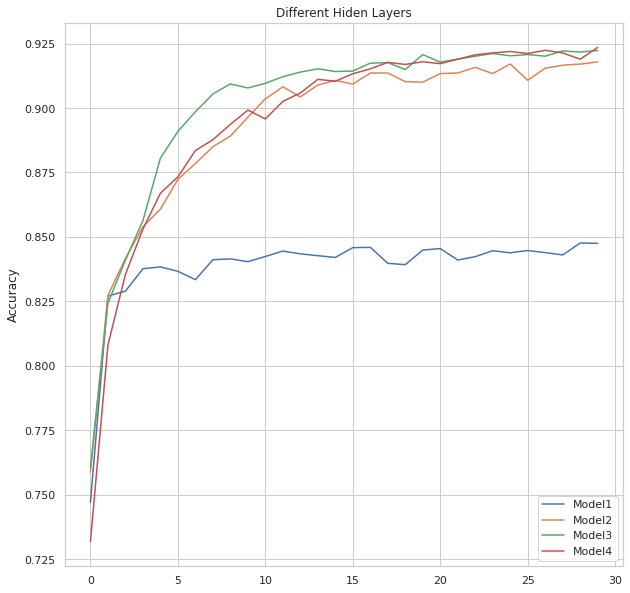

In [ ]:
# plot all 4 models 

plt.figure(figsize=(10,10))
plt.plot(train_history1.history['accuracy'])
plt.plot(train_history2.history['accuracy'])
plt.plot(train_history3.history['accuracy'])
plt.plot(train_history4.history['accuracy'])
plt.title('Different Hiden Layers')
plt.ylabel('Accuracy')
plt.legend(['Model1', 'Model2', 'Model3', 'Model4'], loc="lower right")
plt.show()

#### **2. Learning Rate Optimization (we used model4 as the base model)** 

In [ ]:
# Learning Rate 0.0005 ==> Accuracy: 91.01%
model5 = Sequential([
                    Dense(35, input_shape=[22], activation = 'relu'),
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005), loss = 'binary_crossentropy', metrics = ['accuracy'])


train_history5 = model5.fit(X_train, y_train, epochs = 30, verbose = 2)

Epoch 1/30
2072/2072 - 4s - loss: 1.9847 - accuracy: 0.6869 - 4s/epoch - 2ms/step
Epoch 2/30
2072/2072 - 3s - loss: 0.5096 - accuracy: 0.8007 - 3s/epoch - 2ms/step
Epoch 3/30
2072/2072 - 4s - loss: 0.4858 - accuracy: 0.8159 - 4s/epoch - 2ms/step
Epoch 4/30
2072/2072 - 4s - loss: 0.4835 - accuracy: 0.8224 - 4s/epoch - 2ms/step
Epoch 5/30
2072/2072 - 4s - loss: 0.4480 - accuracy: 0.8307 - 4s/epoch - 2ms/step
Epoch 6/30
2072/2072 - 4s - loss: 0.4433 - accuracy: 0.8340 - 4s/epoch - 2ms/step
Epoch 7/30
2072/2072 - 4s - loss: 0.4374 - accuracy: 0.8362 - 4s/epoch - 2ms/step
Epoch 8/30
2072/2072 - 4s - loss: 0.4318 - accuracy: 0.8397 - 4s/epoch - 2ms/step
Epoch 9/30
2072/2072 - 4s - loss: 0.4385 - accuracy: 0.8387 - 4s/epoch - 2ms/step
Epoch 10/30
2072/2072 - 5s - loss: 0.3883 - accuracy: 0.8521 - 5s/epoch - 3ms/step
Epoch 11/30
2072/2072 - 4s - loss: 0.3761 - accuracy: 0.8560 - 4s/epoch - 2ms/step
Epoch 12/30
2072/2072 - 4s - loss: 0.3508 - accuracy: 0.8642 - 4s/epoch - 2ms/step
Epoch 13/30
2

In [ ]:
# Learning Rate 0.05 ==> Accuracy: 56.74%
model6 = Sequential([
                    Dense(35, input_shape=[22], activation = 'relu'),
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model6.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05), loss = 'binary_crossentropy', metrics = ['accuracy'])


train_history6 = model6.fit(X_train, y_train, epochs = 30, verbose = 2)

Epoch 1/30
2072/2072 - 4s - loss: 0.8340 - accuracy: 0.5672 - 4s/epoch - 2ms/step
Epoch 2/30
2072/2072 - 4s - loss: 0.6852 - accuracy: 0.5675 - 4s/epoch - 2ms/step
Epoch 3/30
2072/2072 - 4s - loss: 0.6852 - accuracy: 0.5675 - 4s/epoch - 2ms/step
Epoch 4/30
2072/2072 - 4s - loss: 0.6849 - accuracy: 0.5672 - 4s/epoch - 2ms/step
Epoch 5/30
2072/2072 - 3s - loss: 0.6851 - accuracy: 0.5669 - 3s/epoch - 2ms/step
Epoch 6/30
2072/2072 - 4s - loss: 0.6853 - accuracy: 0.5673 - 4s/epoch - 2ms/step
Epoch 7/30
2072/2072 - 4s - loss: 0.6849 - accuracy: 0.5675 - 4s/epoch - 2ms/step
Epoch 8/30
2072/2072 - 3s - loss: 0.6851 - accuracy: 0.5672 - 3s/epoch - 2ms/step
Epoch 9/30
2072/2072 - 3s - loss: 0.6849 - accuracy: 0.5675 - 3s/epoch - 2ms/step
Epoch 10/30
2072/2072 - 3s - loss: 0.6850 - accuracy: 0.5675 - 3s/epoch - 2ms/step
Epoch 11/30
2072/2072 - 3s - loss: 0.6853 - accuracy: 0.5675 - 3s/epoch - 2ms/step
Epoch 12/30
2072/2072 - 3s - loss: 0.6853 - accuracy: 0.5675 - 3s/epoch - 2ms/step
Epoch 13/30
2

In [ ]:
# Learning Rate 0.5 ==> Accuracy: 55.19%
model7 = Sequential([
                    Dense(35, input_shape=[22], activation = 'relu'),
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model7.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.5), loss = 'binary_crossentropy', metrics = ['accuracy'])



train_history7 = model7.fit(X_train, y_train, epochs = 30, verbose = 2)

Epoch 1/30
2072/2072 - 4s - loss: 9.3344 - accuracy: 0.5236 - 4s/epoch - 2ms/step
Epoch 2/30
2072/2072 - 4s - loss: 0.6942 - accuracy: 0.5449 - 4s/epoch - 2ms/step
Epoch 3/30
2072/2072 - 4s - loss: 0.6938 - accuracy: 0.5444 - 4s/epoch - 2ms/step
Epoch 4/30
2072/2072 - 4s - loss: 0.6938 - accuracy: 0.5475 - 4s/epoch - 2ms/step
Epoch 5/30
2072/2072 - 4s - loss: 0.6918 - accuracy: 0.5496 - 4s/epoch - 2ms/step
Epoch 6/30
2072/2072 - 4s - loss: 0.6924 - accuracy: 0.5491 - 4s/epoch - 2ms/step
Epoch 7/30
2072/2072 - 5s - loss: 0.6931 - accuracy: 0.5464 - 5s/epoch - 2ms/step
Epoch 8/30
2072/2072 - 4s - loss: 0.6930 - accuracy: 0.5479 - 4s/epoch - 2ms/step
Epoch 9/30
2072/2072 - 3s - loss: 0.6938 - accuracy: 0.5450 - 3s/epoch - 2ms/step
Epoch 10/30
2072/2072 - 3s - loss: 0.6952 - accuracy: 0.5422 - 3s/epoch - 2ms/step
Epoch 11/30
2072/2072 - 4s - loss: 0.6936 - accuracy: 0.5447 - 4s/epoch - 2ms/step
Epoch 12/30
2072/2072 - 4s - loss: 0.6938 - accuracy: 0.5429 - 4s/epoch - 2ms/step
Epoch 13/30
2

In [ ]:
# Learning Rate 0.001 ==> Accuracy: 92.45%
model8 = Sequential([
                    Dense(35, input_shape=[22], activation = 'relu'),
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])

model8.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])


train_history8 = model8.fit(X_train, y_train, epochs = 30, verbose = 2)

Epoch 1/30
2072/2072 - 4s - loss: 0.8715 - accuracy: 0.7157 - 4s/epoch - 2ms/step
Epoch 2/30
2072/2072 - 3s - loss: 0.4943 - accuracy: 0.8111 - 3s/epoch - 2ms/step
Epoch 3/30
2072/2072 - 3s - loss: 0.5047 - accuracy: 0.8192 - 3s/epoch - 2ms/step
Epoch 4/30
2072/2072 - 4s - loss: 0.4415 - accuracy: 0.8369 - 4s/epoch - 2ms/step
Epoch 5/30
2072/2072 - 3s - loss: 0.3846 - accuracy: 0.8540 - 3s/epoch - 2ms/step
Epoch 6/30
2072/2072 - 3s - loss: 0.3601 - accuracy: 0.8627 - 3s/epoch - 2ms/step
Epoch 7/30
2072/2072 - 3s - loss: 0.3526 - accuracy: 0.8687 - 3s/epoch - 2ms/step
Epoch 8/30
2072/2072 - 3s - loss: 0.3119 - accuracy: 0.8802 - 3s/epoch - 2ms/step
Epoch 9/30
2072/2072 - 3s - loss: 0.2989 - accuracy: 0.8851 - 3s/epoch - 2ms/step
Epoch 10/30
2072/2072 - 3s - loss: 0.2879 - accuracy: 0.8885 - 3s/epoch - 2ms/step
Epoch 11/30
2072/2072 - 3s - loss: 0.2649 - accuracy: 0.8962 - 3s/epoch - 2ms/step
Epoch 12/30
2072/2072 - 3s - loss: 0.2598 - accuracy: 0.8978 - 3s/epoch - 2ms/step
Epoch 13/30
2

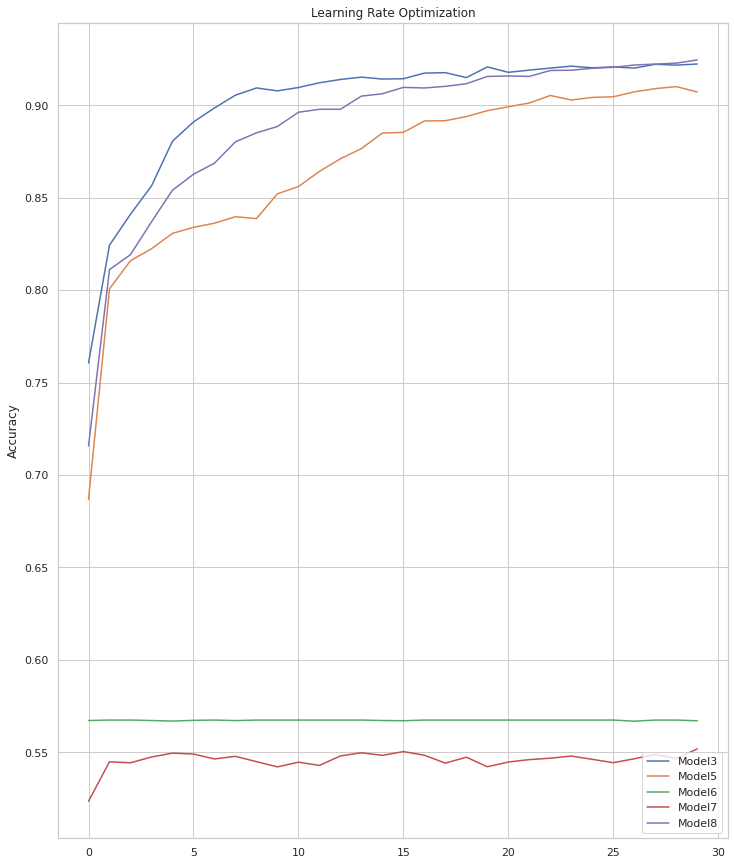

In [ ]:
# plot all 5 models 

plt.figure(figsize=(12,15))
plt.plot(train_history3.history['accuracy'])
plt.plot(train_history5.history['accuracy'])
plt.plot(train_history6.history['accuracy'])
plt.plot(train_history7.history['accuracy'])
plt.plot(train_history8.history['accuracy'])
plt.title('Learning Rate Optimization')
plt.ylabel('Accuracy')
plt.legend(['Model3','Model5', 'Model6', 'Model7', 'Model8'], loc="lower right")
plt.show()

#### **3. Epochs Optimization (we used model 8 as the base model)**

In [ ]:
# 50 epochs ==> Accuracy: 92.73%
model9 = Sequential([
                    Dense(35, input_shape=[22], activation = 'relu'),
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model9.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])


train_history9 = model9.fit(X_train, y_train, epochs = 50, verbose = 2)

Epoch 1/50
2072/2072 - 4s - loss: 0.8679 - accuracy: 0.7217 - 4s/epoch - 2ms/step
Epoch 2/50
2072/2072 - 4s - loss: 0.5632 - accuracy: 0.8039 - 4s/epoch - 2ms/step
Epoch 3/50
2072/2072 - 3s - loss: 0.5362 - accuracy: 0.8200 - 3s/epoch - 2ms/step
Epoch 4/50
2072/2072 - 3s - loss: 0.5026 - accuracy: 0.8292 - 3s/epoch - 2ms/step
Epoch 5/50
2072/2072 - 3s - loss: 0.4469 - accuracy: 0.8436 - 3s/epoch - 2ms/step
Epoch 6/50
2072/2072 - 3s - loss: 0.4108 - accuracy: 0.8501 - 3s/epoch - 2ms/step
Epoch 7/50
2072/2072 - 3s - loss: 0.3883 - accuracy: 0.8586 - 3s/epoch - 2ms/step
Epoch 8/50
2072/2072 - 3s - loss: 0.3965 - accuracy: 0.8570 - 3s/epoch - 2ms/step
Epoch 9/50
2072/2072 - 4s - loss: 0.3465 - accuracy: 0.8677 - 4s/epoch - 2ms/step
Epoch 10/50
2072/2072 - 3s - loss: 0.3395 - accuracy: 0.8728 - 3s/epoch - 2ms/step
Epoch 11/50
2072/2072 - 3s - loss: 0.3140 - accuracy: 0.8790 - 3s/epoch - 2ms/step
Epoch 12/50
2072/2072 - 4s - loss: 0.3168 - accuracy: 0.8792 - 4s/epoch - 2ms/step
Epoch 13/50
2

In [ ]:
# 70 epochs ==> Accuracy: 92.96%
model10 = Sequential([
                    Dense(35, input_shape=[22], activation = 'relu'),
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model10.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])


train_history10 = model10.fit(X_train, y_train, epochs = 70, verbose = 2)

Epoch 1/70
2072/2072 - 4s - loss: 1.0880 - accuracy: 0.7187 - 4s/epoch - 2ms/step
Epoch 2/70
2072/2072 - 3s - loss: 0.6736 - accuracy: 0.7912 - 3s/epoch - 2ms/step
Epoch 3/70
2072/2072 - 4s - loss: 0.6622 - accuracy: 0.8021 - 4s/epoch - 2ms/step
Epoch 4/70
2072/2072 - 7s - loss: 0.6510 - accuracy: 0.8103 - 7s/epoch - 3ms/step
Epoch 5/70
2072/2072 - 7s - loss: 0.6295 - accuracy: 0.8141 - 7s/epoch - 3ms/step
Epoch 6/70
2072/2072 - 3s - loss: 0.6021 - accuracy: 0.8194 - 3s/epoch - 2ms/step
Epoch 7/70
2072/2072 - 3s - loss: 0.5151 - accuracy: 0.8307 - 3s/epoch - 2ms/step
Epoch 8/70
2072/2072 - 3s - loss: 0.5704 - accuracy: 0.8234 - 3s/epoch - 2ms/step
Epoch 9/70
2072/2072 - 3s - loss: 0.5431 - accuracy: 0.8293 - 3s/epoch - 2ms/step
Epoch 10/70
2072/2072 - 3s - loss: 0.4877 - accuracy: 0.8358 - 3s/epoch - 2ms/step
Epoch 11/70
2072/2072 - 3s - loss: 0.4596 - accuracy: 0.8410 - 3s/epoch - 2ms/step
Epoch 12/70
2072/2072 - 3s - loss: 0.4464 - accuracy: 0.8442 - 3s/epoch - 2ms/step
Epoch 13/70
2

In [ ]:
# 80 epochs ==> Accuracy: 93.72%
model11 = Sequential([
                    Dense(35, input_shape=[22], activation = 'relu'),
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model11.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])



train_history11 = model11.fit(X_train, y_train, epochs = 80, verbose = 2)

Epoch 1/80
2072/2072 - 4s - loss: 0.7709 - accuracy: 0.7495 - 4s/epoch - 2ms/step
Epoch 2/80
2072/2072 - 3s - loss: 0.4979 - accuracy: 0.8102 - 3s/epoch - 2ms/step
Epoch 3/80
2072/2072 - 3s - loss: 0.4726 - accuracy: 0.8248 - 3s/epoch - 2ms/step
Epoch 4/80
2072/2072 - 3s - loss: 0.4532 - accuracy: 0.8298 - 3s/epoch - 2ms/step
Epoch 5/80
2072/2072 - 4s - loss: 0.4404 - accuracy: 0.8336 - 4s/epoch - 2ms/step
Epoch 6/80
2072/2072 - 3s - loss: 0.4102 - accuracy: 0.8415 - 3s/epoch - 2ms/step
Epoch 7/80
2072/2072 - 4s - loss: 0.4210 - accuracy: 0.8399 - 4s/epoch - 2ms/step
Epoch 8/80
2072/2072 - 3s - loss: 0.3893 - accuracy: 0.8493 - 3s/epoch - 2ms/step
Epoch 9/80
2072/2072 - 3s - loss: 0.3942 - accuracy: 0.8494 - 3s/epoch - 2ms/step
Epoch 10/80
2072/2072 - 3s - loss: 0.3827 - accuracy: 0.8528 - 3s/epoch - 2ms/step
Epoch 11/80
2072/2072 - 3s - loss: 0.3884 - accuracy: 0.8496 - 3s/epoch - 2ms/step
Epoch 12/80
2072/2072 - 3s - loss: 0.3704 - accuracy: 0.8561 - 3s/epoch - 2ms/step
Epoch 13/80
2

In [ ]:
# 120 epochs ==> Accuracy: 94.54%
model12 = Sequential([
                    Dense(35, input_shape=[22], activation = 'relu'),
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model12.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])



train_history12 = model12.fit(X_train, y_train, epochs = 120, verbose = 2)

Epoch 1/120
2072/2072 - 3s - loss: 0.6766 - accuracy: 0.7513 - 3s/epoch - 2ms/step
Epoch 2/120
2072/2072 - 5s - loss: 0.5161 - accuracy: 0.8130 - 5s/epoch - 3ms/step
Epoch 3/120
2072/2072 - 6s - loss: 0.4855 - accuracy: 0.8254 - 6s/epoch - 3ms/step
Epoch 4/120
2072/2072 - 4s - loss: 0.4438 - accuracy: 0.8347 - 4s/epoch - 2ms/step
Epoch 5/120
2072/2072 - 3s - loss: 0.4222 - accuracy: 0.8407 - 3s/epoch - 1ms/step
Epoch 6/120
2072/2072 - 3s - loss: 0.3823 - accuracy: 0.8538 - 3s/epoch - 1ms/step
Epoch 7/120
2072/2072 - 3s - loss: 0.3664 - accuracy: 0.8597 - 3s/epoch - 1ms/step
Epoch 8/120
2072/2072 - 6s - loss: 0.3327 - accuracy: 0.8706 - 6s/epoch - 3ms/step
Epoch 9/120
2072/2072 - 4s - loss: 0.3113 - accuracy: 0.8757 - 4s/epoch - 2ms/step
Epoch 10/120
2072/2072 - 3s - loss: 0.2844 - accuracy: 0.8847 - 3s/epoch - 1ms/step
Epoch 11/120
2072/2072 - 3s - loss: 0.2743 - accuracy: 0.8903 - 3s/epoch - 1ms/step
Epoch 12/120
2072/2072 - 3s - loss: 0.2572 - accuracy: 0.8970 - 3s/epoch - 1ms/step
E

In [ ]:
model12.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 35)                805       
                                                                 
 dense_4 (Dense)             (None, 25)                900       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,731
Trainable params: 1,731
Non-trainable params: 0
_________________________________________________________________


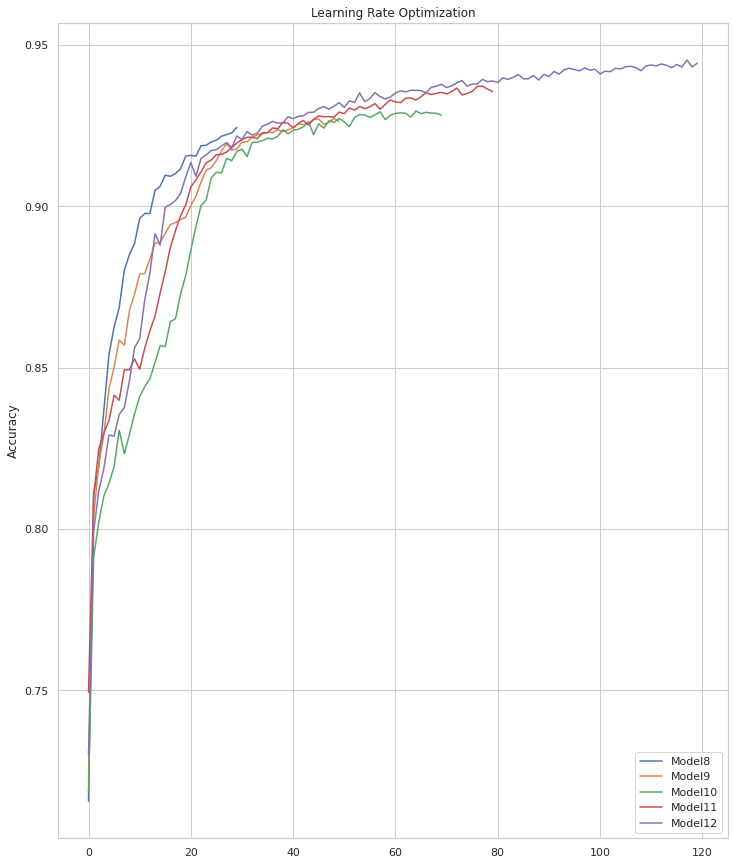

In [ ]:
# plot all 5 models 

plt.figure(figsize=(12,15))
plt.plot(train_history8.history['accuracy'])
plt.plot(train_history9.history['accuracy'])
plt.plot(train_history10.history['accuracy'])
plt.plot(train_history11.history['accuracy'])
plt.plot(train_history12.history['accuracy'])
plt.title('Learning Rate Optimization')
plt.ylabel('Accuracy')
plt.legend(['Model8','Model9', 'Model10', 'Model11', 'Model12'], loc="lower right")
plt.show()

**--> Best model is Adam activation, 0.001 learning rate, 120 epochs, 1st layer 35 units, 2nd layer 25 units)**

#### **3. Fiiting Validation Dataset (we used model 12 as the base model)**

In [ ]:
model13 = Sequential([
                    Dense(35, input_shape=[22], activation = 'relu'),
                    Dense(25, input_shape=[22], activation = 'relu'),
                    Dense(1, activation = 'sigmoid')        
])


model13.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])



train_history13 = model13.fit(X_train, y_train, epochs = 120, verbose = 2, validation_data= (X_val, y_val))

Epoch 1/120
2072/2072 - 5s - loss: 1.2611 - accuracy: 0.7006 - val_loss: 0.6529 - val_accuracy: 0.7134 - 5s/epoch - 2ms/step
Epoch 2/120
2072/2072 - 4s - loss: 0.6374 - accuracy: 0.7883 - val_loss: 0.9346 - val_accuracy: 0.6978 - 4s/epoch - 2ms/step
Epoch 3/120
2072/2072 - 4s - loss: 0.6035 - accuracy: 0.8078 - val_loss: 0.9104 - val_accuracy: 0.7009 - 4s/epoch - 2ms/step
Epoch 4/120
2072/2072 - 4s - loss: 0.5293 - accuracy: 0.8204 - val_loss: 0.4141 - val_accuracy: 0.8548 - 4s/epoch - 2ms/step
Epoch 5/120
2072/2072 - 5s - loss: 0.4990 - accuracy: 0.8265 - val_loss: 0.4232 - val_accuracy: 0.8327 - 5s/epoch - 2ms/step
Epoch 6/120
2072/2072 - 5s - loss: 0.5050 - accuracy: 0.8304 - val_loss: 0.3525 - val_accuracy: 0.8683 - 5s/epoch - 2ms/step
Epoch 7/120
2072/2072 - 4s - loss: 0.4558 - accuracy: 0.8385 - val_loss: 0.3470 - val_accuracy: 0.8687 - 4s/epoch - 2ms/step
Epoch 8/120
2072/2072 - 5s - loss: 0.4375 - accuracy: 0.8408 - val_loss: 0.3426 - val_accuracy: 0.8698 - 5s/epoch - 2ms/step


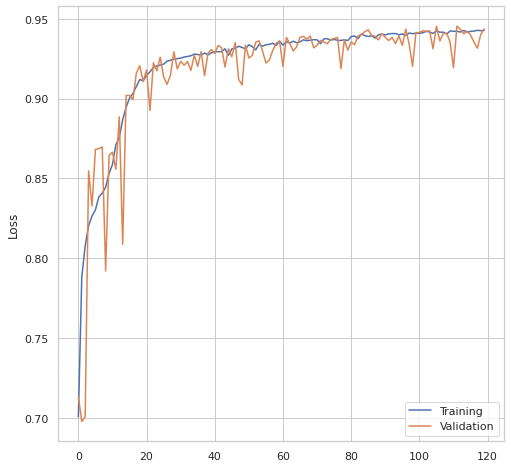

In [ ]:
# Plot Training and Validation - Accuracy

plt.figure(figsize=(8,8))
plt.plot(train_history13.history['accuracy'])
plt.plot(train_history13.history['val_accuracy'])
plt.ylabel('Loss')
plt.legend(['Training','Validation'], loc="lower right")
plt.show()

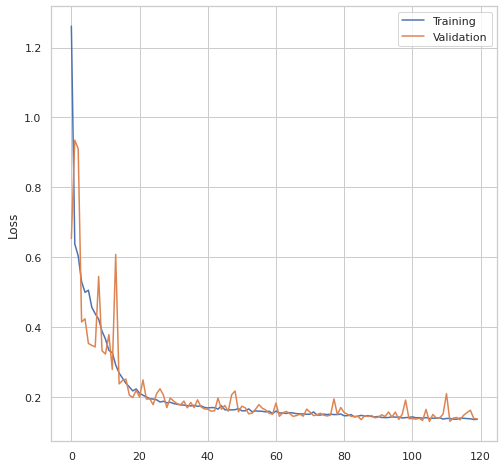

In [ ]:
# Plot Training and Validation - Loss

plt.figure(figsize=(8,8))
plt.plot(train_history13.history['loss'])
plt.plot(train_history13.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['Training','Validation'], loc="upper right")
plt.show()

### **Testing**

In [ ]:
test_loss, test_accuracy = model4.evaluate(X_test, y_test)

648/648 [==============================] - 1s 2ms/step - loss: 0.2042 - accuracy: 0.9184


In [ ]:
test_loss, test_accuracy = model5.evaluate(X_test, y_test)

648/648 [==============================] - 1s 2ms/step - loss: 0.2371 - accuracy: 0.9048


In [ ]:
test_loss, test_accuracy = model8.evaluate(X_test, y_test)

648/648 [==============================] - 2s 3ms/step - loss: 0.2304 - accuracy: 0.9097


In [ ]:
test_loss, test_accuracy = model12.evaluate(X_test, y_test)

648/648 [==============================] - 2s 3ms/step - loss: 0.1346 - accuracy: 0.9426


# **Predic on New Data**

In [ ]:
new_sample = pd.read_csv("new_sample.csv")
new_sample.sample(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,3,5,4,3,1,1,2,5,0,0
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,2,4,1,3,2,2,2,0,0
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,5,4,5,3,0,0


In [ ]:
new_sample.shape

(10, 24)

In [ ]:
new_sample.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
# Dropping Unnamed: 0:
new_sample = new_sample.drop(['Unnamed: 0', 'id'], axis=1)

# Dropping Nulls
#df_test = df_test.dropna(how='any',axis=0)


#df.isnull().sum()

In [ ]:
new_sample_org = new_sample.copy()
#new_sample_org

In [ ]:
# Convert categorical to numerical
labelencoder = LabelEncoder()
new_sample['Gender'] = labelencoder.fit_transform(new_sample['Gender'])
new_sample['Customer Type'] = labelencoder.fit_transform(new_sample['Customer Type'])
new_sample['Type of Travel'] = labelencoder.fit_transform(new_sample['Type of Travel'])
new_sample['Class'] = labelencoder.fit_transform(new_sample['Class'])

In [ ]:
new_sample.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
8,0,0,31,0,1,728,2,5,5,5,...,2,2,4,3,3,4,3,2,2,0
1,0,0,36,0,0,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0
9,0,0,46,0,0,1744,2,2,2,2,...,4,4,4,4,4,5,4,4,28,14
7,1,0,50,1,1,83,3,4,0,3,...,2,2,4,2,4,4,5,2,5,2
5,1,0,16,0,1,311,3,3,3,3,...,3,5,4,3,1,1,2,5,0,0


In [ ]:
# Convert into Numpy Array

samples_to_predict = new_sample.to_numpy()

# predicting New Sample
predictions = model12.predict(samples_to_predict)
predictions=np.round(predictions)
predictions

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
new_sample['preds'] = predictions

df_out = pd.merge(new_sample_org,new_sample[['preds']],how = 'left',left_index = True, right_index = True)
df_out

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,preds
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44,1.0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0,1.0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0,0.0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6,1.0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20,0.0
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0,1.0
6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,4,5,3,0,0,1.0
7,Male,Loyal Customer,50,Personal Travel,Eco,83,3,4,0,3,...,2,4,2,4,4,5,2,5,2,0.0
8,Female,Loyal Customer,31,Business travel,Eco,728,2,5,5,5,...,2,4,3,3,4,3,2,2,0,0.0
9,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,2,...,4,4,4,4,5,4,4,28,14,1.0
